# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
import sklearn 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
baseball=pd.read_csv('baseball.csv')

In [3]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#Cleaning Columns
baseball.columns=['Wins','Runs','At_bats','Hits','Doubles','Triples','Home_runs','Walks','Strike_Outs','Stolen_bases','Runs_allowed','Earned_runs','Earned_run_avarage','Complete_games','Shoot_outs','Saves','Errors']

In [5]:
baseball.head()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


That you may see the difference before cleansing and after cleansing columns 

# Statistical Description

In [6]:
baseball.shape

(30, 17)

30 rows and 17 colummns present in this dataset

And the target variable is Wins 

In [7]:
baseball.describe()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Observations:

From here minimum runs is 573 and Maximum runs is 891.

Least Number of wins are 63 and Maximum number of wins are 100 .

Minimum doubles are 236 and Maximum doubles are 308

In strike_outs the difference between 75% and 100% is more in the sense it contains outliers 

In [8]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Wins                  30 non-null int64
Runs                  30 non-null int64
At_bats               30 non-null int64
Hits                  30 non-null int64
Doubles               30 non-null int64
Triples               30 non-null int64
Home_runs             30 non-null int64
Walks                 30 non-null int64
Strike_Outs           30 non-null int64
Stolen_bases          30 non-null int64
Runs_allowed          30 non-null int64
Earned_runs           30 non-null int64
Earned_run_avarage    30 non-null float64
Complete_games        30 non-null int64
Shoot_outs            30 non-null int64
Saves                 30 non-null int64
Errors                30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


other than Earned_run_average every attribute information contains interger values and earned_run_avarage is in Float

# Exploratory Data analysis

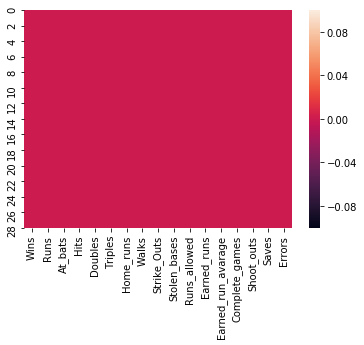

In [9]:
#to check null values
sns.heatmap(baseball.isnull())

It's clear that there is no null data is present in this dataset

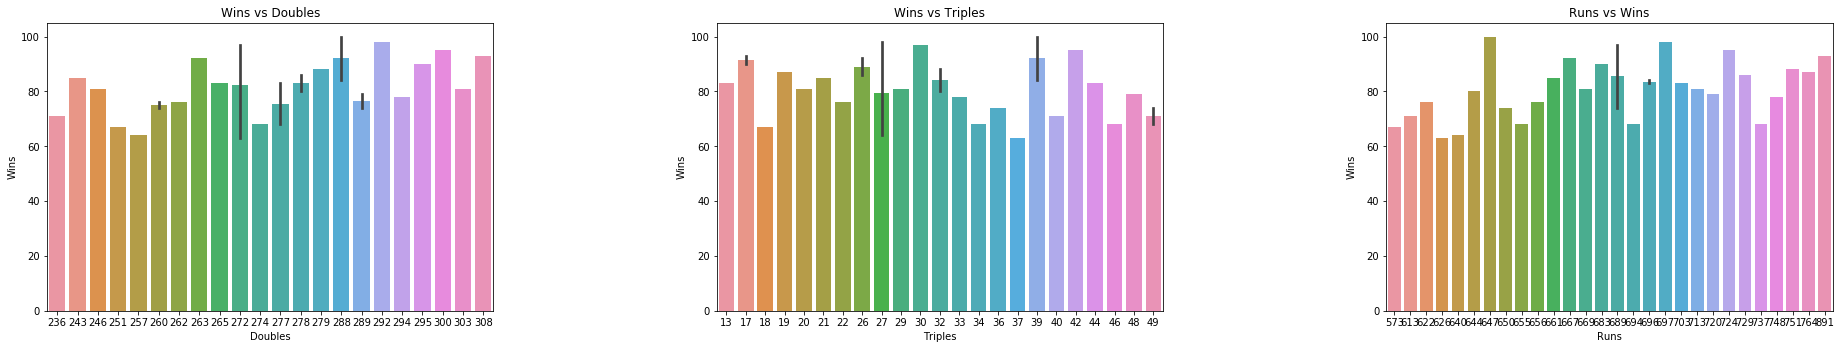

In [10]:
plt.figure(figsize=(32,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Wins vs Doubles')
sns.barplot(x="Doubles", y="Wins", data=baseball)
plt.subplot(132)
plt.title('Wins vs Triples')
sns.barplot(x="Triples", y="Wins", data=baseball)
plt.subplot(133)
plt.title('Runs vs Wins')
sns.barplot(x="Runs", y="Wins", data=baseball)

If doubles more chances of winning percentage is high and If triples are more than 13 chances of winning rate is high.

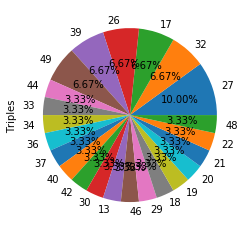

In [11]:
baseball['Triples'].value_counts().plot.pie(autopct="%2.2f%%")

Here we can observe one thing 10% of peoples have 27 triples.

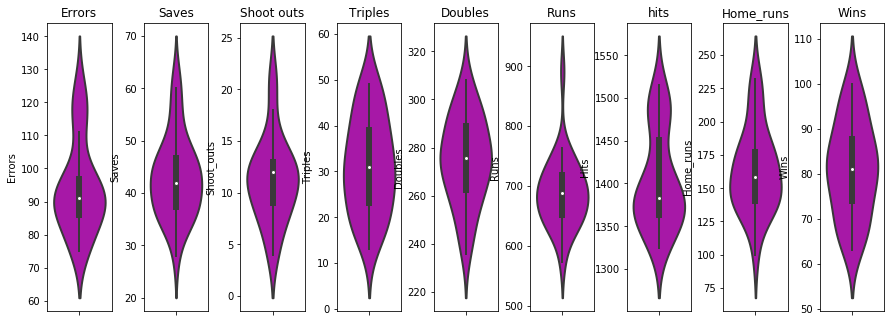

In [12]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(191)
plt.title('Errors')
sns.violinplot(y='Errors',data=baseball,color='m',linewidth=2)
plt.subplot(192)
plt.title('Saves')
sns.violinplot(y='Saves',data= baseball,color='m',linewidth=2)
plt.subplot(193)
plt.title('Shoot outs')
sns.violinplot(y='Shoot_outs',data=baseball,color='m',linewidth=2)
plt.subplot(194)
plt.title('Triples')
sns.violinplot(y='Triples',data=baseball,color='m',linewidth=2)
plt.subplot(195)
plt.title('Doubles')
sns.violinplot(y='Doubles',data=baseball,color='m',linewidth=2)
plt.subplot(196)
plt.title('Runs')
sns.violinplot(y='Runs',data=baseball,color='m',linewidth=2)
plt.subplot(197)
plt.title('hits')
sns.violinplot(y='Hits',data=baseball,color='m',linewidth=2)
plt.subplot(198)
plt.title('Home_runs')
sns.violinplot(y='Home_runs',data=baseball,color='m',linewidth=2)
plt.subplot(199)
plt.title('Wins')
sns.violinplot(y='Wins',data=baseball,color='m',linewidth=2)

From here we can observe that around 80 wins are depend on Errors value is in between 80-90 ,Saves range(40-50),Shoot_outs range(10-15),Triples range(20-40),Doubles range(260-280),Runs range(600-700),Hits range(1350-1400),Home_runs range(125-175 ) all these features range plays a key role while winning chances.

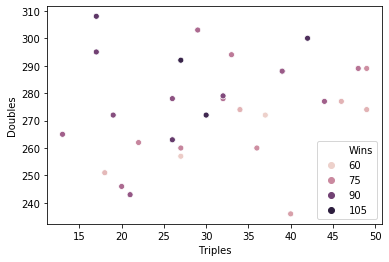

In [13]:
sns.scatterplot(x='Triples',y='Doubles',hue='Wins',data =baseball)

Triples increases Doubles automatically decreases and chances of winning rate automatically decreases.

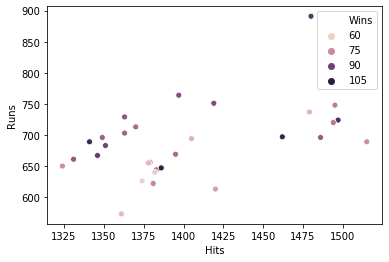

In [14]:
sns.scatterplot(x='Hits',y='Runs',hue='Wins',data =baseball)

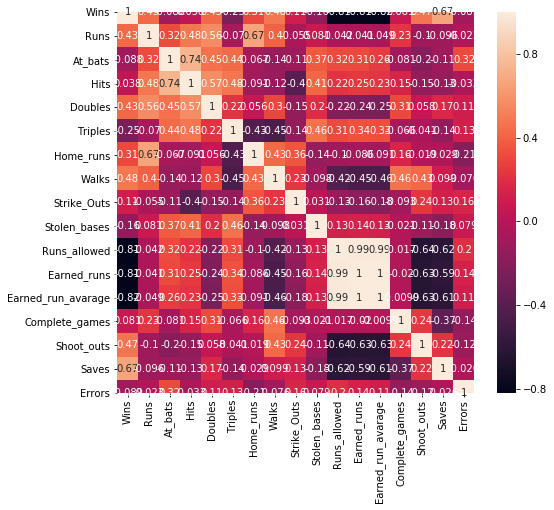

In [15]:
#to check Cor-relation
corr_hmap=baseball.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

At_bats is highly cor-related with Hits.

# Creating New Features

In [16]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
baseball['Win_bin'] = baseball['Wins'].apply(assign_win_bins)

In [17]:
baseball.head()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors,Win_bin
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,4
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,3
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,3
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,3
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,3


In [18]:
# Create  runs per game feature
baseball['Runs_per_game']=baseball['Runs'] /baseball['Complete_games']
baseball['Runs_allowed_per_game']=baseball['Runs_allowed']/baseball['Complete_games']
baseball['Runs_per_game']

0     362.000000
1     348.000000
2      60.818182
3      88.857143
4      98.428571
5     127.285714
6     254.666667
7            inf
8     644.000000
9     249.333333
10    150.200000
11    145.800000
12    330.500000
13    109.333333
14    138.800000
15    647.000000
16           inf
17    114.833333
18    655.000000
19    320.000000
20    683.000000
21    175.750000
22           inf
23    191.000000
24    626.000000
25    111.166667
26     99.428571
27    720.000000
28    650.000000
29    184.250000
Name: Runs_per_game, dtype: float64

In [19]:
baseball['Runs_per_game']

0     362.000000
1     348.000000
2      60.818182
3      88.857143
4      98.428571
5     127.285714
6     254.666667
7            inf
8     644.000000
9     249.333333
10    150.200000
11    145.800000
12    330.500000
13    109.333333
14    138.800000
15    647.000000
16           inf
17    114.833333
18    655.000000
19    320.000000
20    683.000000
21    175.750000
22           inf
23    191.000000
24    626.000000
25    111.166667
26     99.428571
27    720.000000
28    650.000000
29    184.250000
Name: Runs_per_game, dtype: float64

It's better to drop wins,runs and runs_allowed columns from the dataset.

# Data cleaning

In [20]:
pd.set_option('use_inf_as_na', True)

In [21]:
baseball.replace([np.inf, -np.inf], np.nan)

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors,Win_bin,Runs_per_game,Runs_allowed_per_game
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,4,362.000000,320.500000
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,3,348.000000,350.000000
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,3,60.818182,58.181818
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,3,88.857143,100.142857
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,3,98.428571,114.714286
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,4,127.285714,95.714286
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,3,254.666667,232.666667
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,3,NaN,NaN
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,3,644.000000,642.000000
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,3,249.333333,251.000000


In [22]:
baseball.drop(['Runs','Runs_allowed','Wins'],axis=1,inplace=True)

In [23]:
baseball.replace([np.inf, -np.inf], np.nan)

,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors,Win_bin,Runs_per_game,Runs_allowed_per_game
0,5575,1497,300,42,139,383,973,104,601,3.73,2,8,56,88,4,362.000000,320.500000
1,5467,1349,277,44,156,439,1264,70,653,4.07,2,12,45,86,3,348.000000,350.000000
2,5439,1395,303,29,141,533,1157,86,584,3.67,11,10,38,79,3,60.818182,58.181818
3,5533,1381,260,27,136,404,1231,68,643,3.98,7,9,37,101,3,88.857143,100.142857
4,5605,1515,289,49,151,455,1259,83,746,4.64,7,12,35,86,3,98.428571,114.714286
5,5509,1480,308,17,232,570,1151,88,609,3.80,7,10,34,88,4,127.285714,95.714286
6,5567,1397,272,19,212,554,1227,63,652,4.03,3,4,48,93,3,254.666667,232.666667
7,5485,1370,246,20,217,418,1331,44,646,4.05,0,10,43,77,3,NaN,NaN
8,5485,1383,278,32,167,436,1310,87,604,3.74,1,12,60,95,3,644.000000,642.000000
9,5640,1495,294,33,161,478,1148,71,694,4.31,3,10,40,97,3,249.333333,251.000000


In [24]:
baseball.drop([7,16,22],axis=0,inplace=True)

# Detecting and Removing Outliers

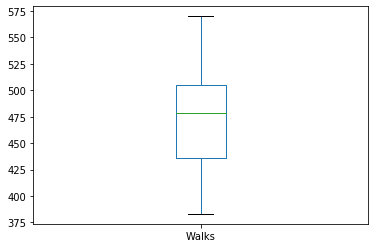

In [25]:
baseball['Walks'].plot.box()

At_bats                     AxesSubplot(0.125,0.536818;0.065678x0.343182)
Hits                     AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Doubles                  AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Triples                  AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Home_runs                AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Walks                    AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Strike_Outs              AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Stolen_bases             AxesSubplot(0.676695,0.536818;0.065678x0.343182)
Earned_runs              AxesSubplot(0.755508,0.536818;0.065678x0.343182)
Earned_run_avarage       AxesSubplot(0.834322,0.536818;0.065678x0.343182)
Complete_games                 AxesSubplot(0.125,0.125;0.065678x0.343182)
Shoot_outs                  AxesSubplot(0.203814,0.125;0.065678x0.343182)
Saves                       AxesSubplot(0.282627,0.125;0.065678x0.343182)
Errors                      AxesSubplo

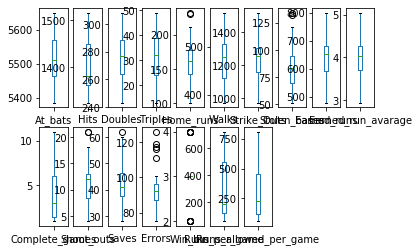

In [26]:
baseball.plot(kind='box',subplots=True,layout=(2,10))

you can observe here Runs ,Errors ,Saves shot_outs Earned_run_average has contains outliers and need to remove those outliers

# Check Distribution of Skewness

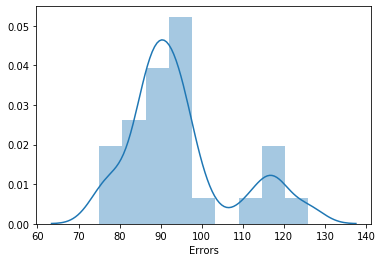

In [27]:
sns.distplot(baseball['Errors'])

In [28]:
collist=baseball.iloc[:,:-3].columns
ncol=16
nrows=14

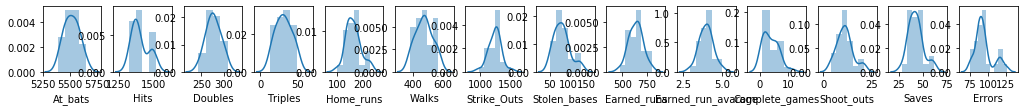

In [29]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(baseball[collist[i]])

Runs ,Stolen_bases,Home_runs Doubles and Triples are Normal distributed.

In [30]:
x=baseball.drop('Win_bin',axis=1)
x.head()

,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors,Runs_per_game,Runs_allowed_per_game
0,5575,1497,300,42,139,383,973,104,601,3.73,2,8,56,88,362.000000,320.500000
1,5467,1349,277,44,156,439,1264,70,653,4.07,2,12,45,86,348.000000,350.000000
2,5439,1395,303,29,141,533,1157,86,584,3.67,11,10,38,79,60.818182,58.181818
3,5533,1381,260,27,136,404,1231,68,643,3.98,7,9,37,101,88.857143,100.142857
4,5605,1515,289,49,151,455,1259,83,746,4.64,7,12,35,86,98.428571,114.714286


In [31]:
le=LabelEncoder()
list1=['At_bats', 'Hits', 'Doubles', 'Triples', 'Home_runs', 'Walks',
       'Strike_Outs', 'Stolen_bases', 'Earned_runs',
       'Earned_run_avarage', 'Complete_games', 'Shoot_outs', 'Saves',
       'Errors','Runs_per_game','Runs_allowed_per_game']
for val in list1:
    x[val]=le.fit_transform(x[val].astype(str))

In [32]:
y=baseball['Win_bin']
y.head()

0    4
1    3
2    3
3    3
4    3
Name: Win_bin, dtype: int64

In [33]:
x.skew()

At_bats                  0.000000
Hits                     0.071254
Doubles                  0.024652
Triples                  0.072378
Home_runs               -0.040534
Walks                   -0.007987
Strike_Outs              0.000000
Stolen_bases            -0.052157
Earned_runs              0.000000
Earned_run_avarage       0.000000
Complete_games           0.107970
Shoot_outs               0.403464
Saves                    0.015668
Errors                  -0.402826
Runs_per_game            0.000000
Runs_allowed_per_game    0.000000
dtype: float64

Need to remove skewness of these features

In [34]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [35]:
x.skew()

At_bats                  0.000000
Hits                     0.071254
Doubles                  0.024652
Triples                  0.072378
Home_runs               -0.040534
Walks                   -0.007987
Strike_Outs              0.000000
Stolen_bases            -0.052157
Earned_runs              0.000000
Earned_run_avarage       0.000000
Complete_games           0.107970
Shoot_outs               0.403464
Saves                    0.015668
Errors                  -0.402826
Runs_per_game            0.000000
Runs_allowed_per_game    0.000000
dtype: float64

From here you can observe that the data is now perfect.

# Splitting Dataset into training and testing

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=41)

In [37]:
x_train.shape

(21, 16)

In [38]:
y_train.shape

(21,)

In [39]:
x_test.shape

(6, 16)

In [40]:
y_test.shape

(6,)

In [41]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [42]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Building a MachineLearning Model

In [43]:
lr=LinearRegression(normalize=True)
rfr=RandomForestRegressor()
rg=RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

In [44]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr))
models.append(('RidgeCV',rg))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.9015225854528126


Performance Measures:
MAE 0.5123236077697811
MSE 0.4009910290737915
RMSE 0.6332385246285885
R-square 0.3985134563893127
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.83375


Performance Measures:
MAE 0.5666666666666667
MSE 0.47000000000000003
RMSE 0.6855654600401044
R-square 0.29499999999999993
*********************** RidgeCV ************


Ridge

In [45]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,90.152259,0.512324,0.400991,0.633239,0.398513
1,RandomForestRegressor,83.375000,0.566667,0.470000,0.685565,0.295000
2,RidgeCV,72.996735,0.584739,0.427685,0.653976,0.358473


# Predicting Data

In [46]:
pred=lr.predict(x_test)
print("predicted wins",pred)
print("actual wins",y_test)

predicted wins [3.26760141 2.934992   3.55540579 2.90762339 2.2486467  3.08573071]
actual wins 8     3
23    2
17    4
5     4
24    2
12    3
Name: Win_bin, dtype: int64


# Saving Model

In [47]:
baseball=pd.DataFrame(pred)
baseball.to_csv('linear_baseball.csv')

In [48]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lr,'baseball.obj')
#load the model from a file
dct_from_joblib=joblib.load('baseball.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([3.26760141, 2.934992  , 3.55540579, 2.90762339, 2.2486467 ,
       3.08573071])

Upto now it's done.